Reference:

https://scikit-posthocs.readthedocs.io/en/latest/tutorial.html

# Non-parametric ANOVA with post hoc tests

If normality and other assumptions are violated, one can use a non-parametric Kruskal-Wallis H test (one-way non-parametric ANOVA) to test if samples came from the same distribution.

Let’s use the same dataset just to demonstrate the procedure. Kruskal-Wallis test is implemented in SciPy package. scipy.stats.kruskal method accepts array-like structures, but not DataFrames.

In [20]:
import scipy.stats as ss
import statsmodels.api as sa
import scikit_posthocs as sp
import plotly.express as px

In [21]:
df = sa.datasets.get_rdataset('iris').data
data = [df.loc[ids, 'Sepal.Width'].values for ids in df.groupby('Species').groups.values()]

data is a list of 1D arrays containing sepal width values, one array per each species. Now we can run Kruskal-Wallis analysis of variance.

In [22]:
H, p = ss.kruskal(*data)
p

1.5692820940316782e-14

P value tells us we may reject the null hypothesis that the population medians of all of the groups are equal. To learn what groups (species) differ in their medians we need to run post hoc tests. scikit-posthocs provides a lot of non-parametric tests mentioned above. Let’s choose Conover’s test.

In [23]:
pc = sp.posthoc_conover(df, val_col='Sepal.Width', group_col='Species', p_adjust = 'holm')
pc

,setosa,versicolor,virginica
setosa,1.000000e+00,2.278515e-18,1.293888e-10
versicolor,2.278515e-18,1.000000e+00,1.881294e-03
virginica,1.293888e-10,1.881294e-03,1.000000e+00


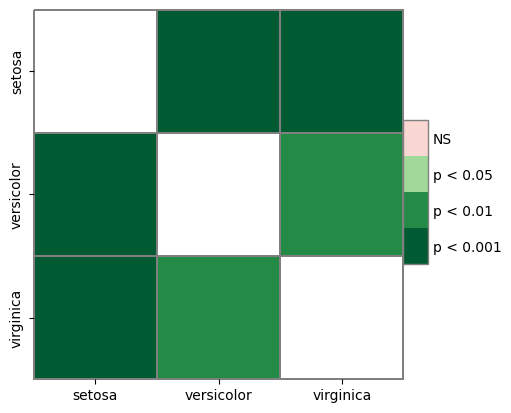

In [24]:
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square':True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args);

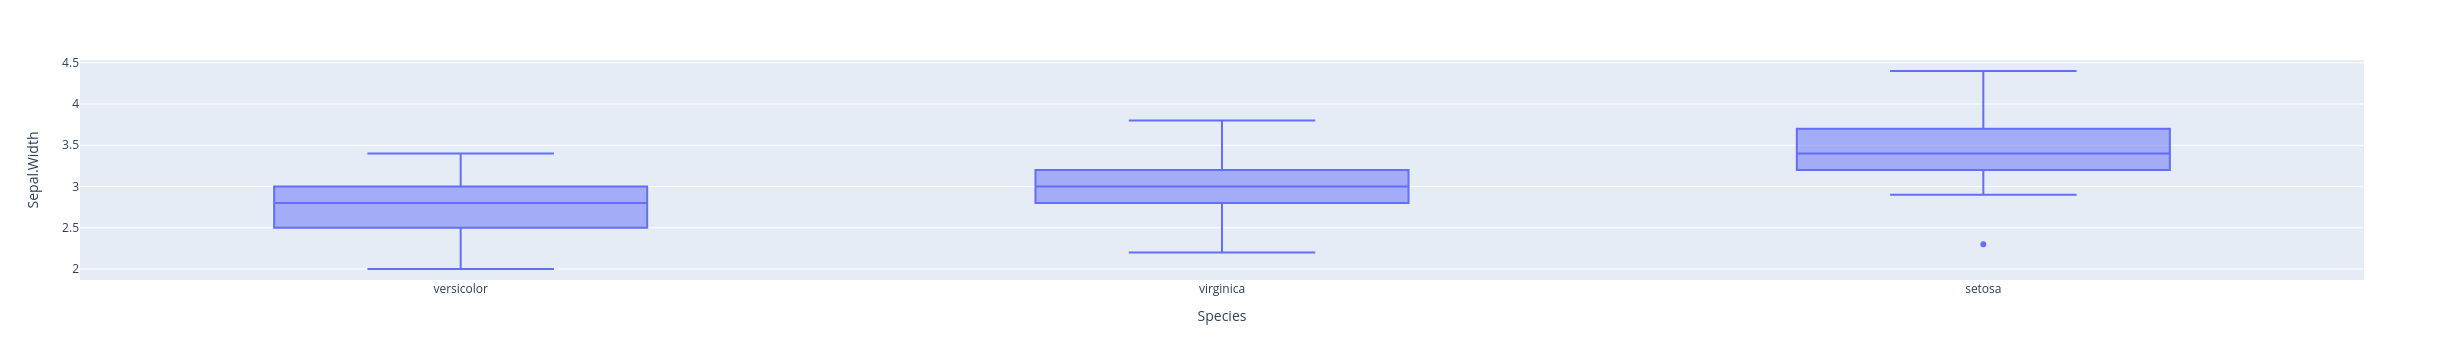

In [25]:
fig = px.box(df, x='Species', y='Sepal.Width')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total ascending'})